<a href="https://www.kaggle.com/code/sofiamatias/playground-s3e11-regression-with-auto-sklearn?scriptVersionId=123831207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install sweetviz
!pip install hummingbird_ml
!pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 55.5 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 48.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.9 MB

In [2]:
!pip install auto-sklearn

In [3]:
from hummingbird.ml import convert
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
try:
    import autosklearn.regression
except:
    import autosklearn.regression
#import autosklearn.classification
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import SCORERS, mean_squared_log_error
from sklearn.decomposition import PCA
from IPython.display import FileLink, display
from torch import cuda
print ('\nFinished with imports.\n')


Finished with imports.



# Load Data

In [4]:
input_filepath = '/kaggle/input'

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        if 'test' in filepath:
            test_df = pd.read_csv (filepath)
        elif 'train' in filepath:
            train_df = pd.read_csv (filepath)
        else:
            sample_df = pd.read_csv (filepath)
display(train_df)
display(test_df)
display(sample_df)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,360331,7.60,4.0,5.0,5.0,3.0,13.50,1.0,0.0,33.0,30268.0,0.0,0.0,0.0,0.0,0.0,133.42
360332,360332,14.44,4.0,4.0,0.0,4.0,18.80,1.0,1.0,18.0,20319.0,0.0,0.0,0.0,0.0,0.0,81.85
360333,360333,10.74,3.0,0.0,0.0,2.0,11.30,1.0,0.0,35.0,30584.0,1.0,1.0,1.0,1.0,1.0,87.07
360334,360334,11.04,3.0,1.0,0.0,3.0,10.20,0.0,1.0,14.0,30584.0,1.0,1.0,1.0,1.0,1.0,146.72


,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240219,600555,8.60,4.0,0.0,0.0,1.0,8.39,0.0,0.0,16.0,38382.0,0.0,0.0,0.0,0.0,0.0
240220,600556,4.30,2.0,2.0,0.0,4.0,7.88,1.0,0.0,4.0,30268.0,0.0,0.0,0.0,0.0,0.0
240221,600557,6.30,3.0,0.0,0.0,3.0,11.50,0.0,0.0,13.0,39696.0,0.0,0.0,1.0,1.0,0.0
240222,600558,7.94,2.0,0.0,0.0,2.0,8.33,1.0,0.0,8.0,23759.0,1.0,0.0,1.0,1.0,1.0


,id,cost
0,360336,99.615
1,360337,99.615
2,360338,99.615
3,360339,99.615
4,360340,99.615
...,...,...
240219,600555,99.615
240220,600556,99.615
240221,600557,99.615
240222,600558,99.615


In [5]:
target = 'cost'
print ('\nTarget is:', target)
print ('\nTarget distribution:')
train_df.cost.value_counts()


Target is: cost

Target distribution:


101.84    4766
69.63     4280
81.79     4177
59.86     3929
131.81    3525
          ... 
69.15       98
101.57      96
77.70       83
101.75      83
84.11       67
Name: cost, Length: 328, dtype: int64

In [6]:
# Check which metric you 
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

# EDA

In [7]:
def EDA_report (data: pd.DataFrame):
    """
    Generates an EDA report using sweetviz package. Use "data" as your dataset
    """
    import datetime
    import sweetviz as sw

    now = datetime.datetime.now()
    report_filename = f'EDA_report{now}.html'

    analyze_report = sw.analyze(data)
    analyze_report.show_html(report_filename, open_browser = True)
    
    link = FileLink (report_filename)
    print ('\nClick here to open report:')
    display(link)

    return None

## Categorical features - correlation with target

In [8]:
categorical_features = False

In [9]:
if categorical_features:
    #half_col_num = len (train_df.columns) // 2
    features = ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
                'florist']#train_df.columns[0:half_col_num]
    sns.relplot(
        x="value", y=target, col="variable", data=train_df.melt(id_vars=target, value_vars=features), facet_kws=dict(sharex=False),
    );

In [10]:
if categorical_features:
    half_col_num = len (train_df.columns) // 2
    features = train_df.columns[half_col_num: len (train_df.columns)]
    sns.relplot(
        x="value", y=target, col="variable", data=train_df.melt(id_vars=target, value_vars=features), facet_kws=dict(sharex=False),
    );

In [11]:
# Check sadd_prefixpecific features correlations: update the name of features to use this cell, otherwise it just displays the first 'object' column
if categorical_features:
    feature = [col for col in train_df.columns if train_df[col].dtype in ['object', 'category']][0]

    sns.lmplot(
        x=feature, y=target, hue="cut", col="cut",
        data=train_df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
    );

### Categorical features with relevance
* no category features


## Features correlation

In [12]:
#EDA_report (train_df)

## Analysis

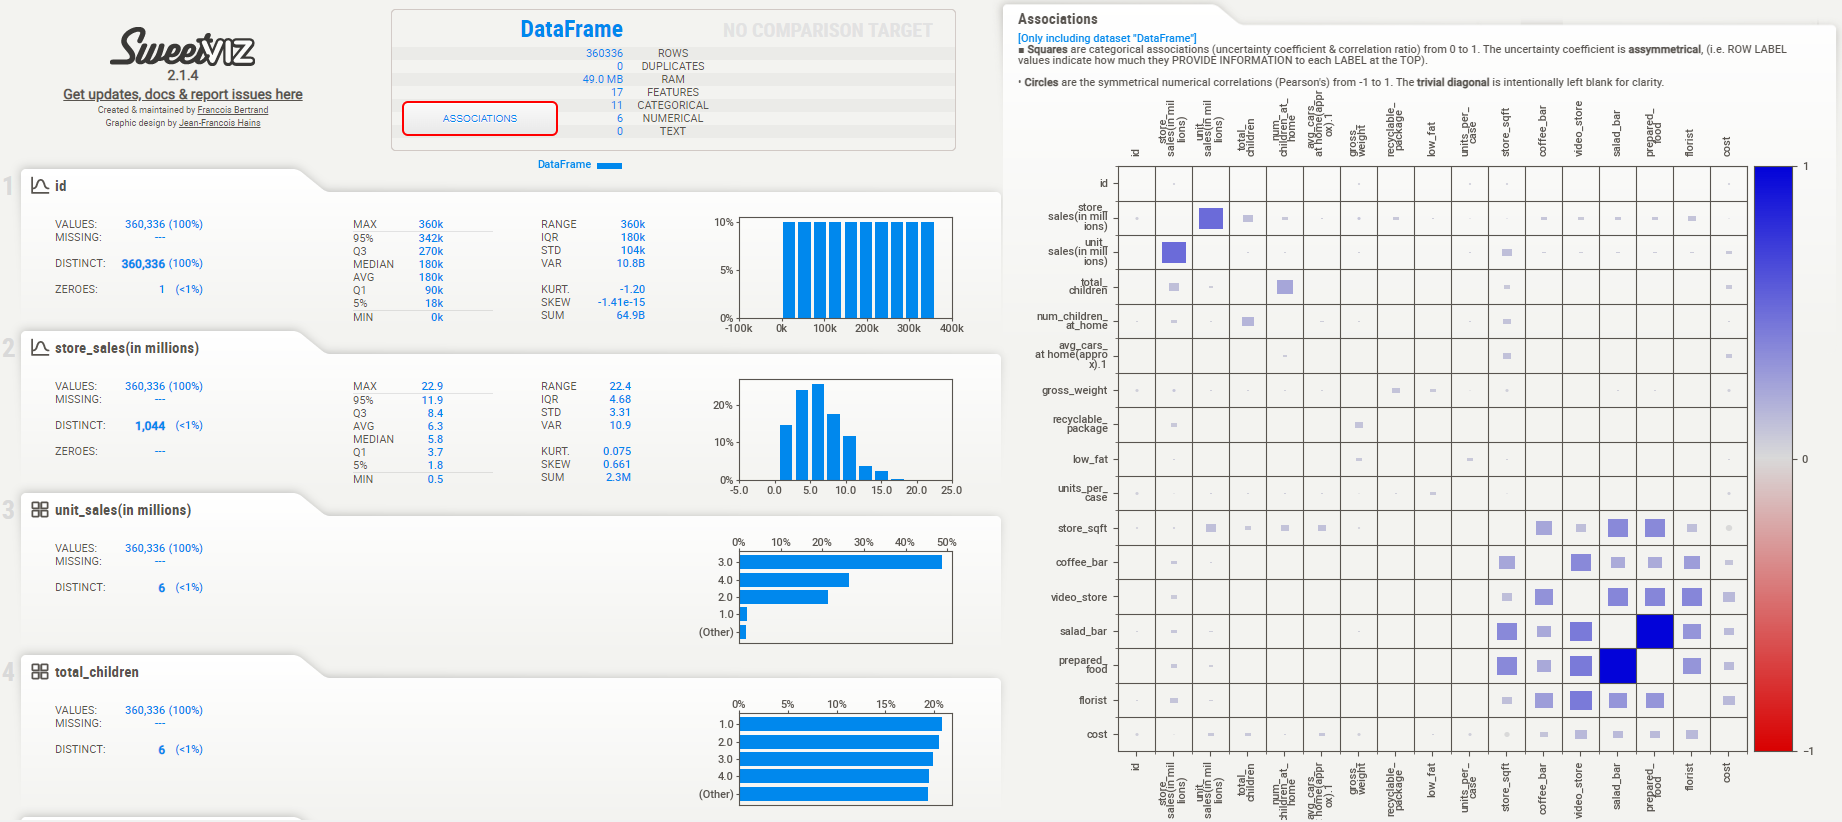

| | feature | feature importance |
| :-: | :-: | :-: |
| 9 | store_sqft | 621 |
| 2 | total_children | 521 |
| 3 | num_children_at_home | 427 |
| 4 | avg_cars_at_home(approx).1 | 357 |
| 0 | store_sales(in_millions) | 340 |
| 5 | gross_weight | 298 |
| 8 | units_per_case | 210 |
| 1 | unit_sales(in_millions) | 116 |
| 10 | coffee_bar | 113 |
| 11 | video_store | 87 |
| 14 | florist | 74 |
| 13 | prepared_food | 67 |
| 12 | salad_bar | 66 |
| 7 | low_fat | 30 |
| 6 | recyclable_package | 22 |

## Baseline Score : 0.301245 (LB: 0.30043) 

Delete following highly correlated columns:
* prepared_food
* unit sales 

In [13]:
X = train_df.drop (columns = ['id', target])
y = train_df[target]
X_test = test_df.drop (columns = ['id'])
#sns.pairplot(X)

# Preprocess Data

In [14]:
baseline = False
normalize = False
delete_cols = True
add_ratio_features = False
add_pca_features = False

In [15]:
if not(baseline) and normalize:
    # Normalize data
    scaler = MinMaxScaler()
    # transform data
    scaled = scaler.fit_transform(X)
    test_scaled = scaler.fit_transform(X_test)
    X = pd.DataFrame (scaled, columns = X.columns)
    X_test = pd.DataFrame (test_scaled, columns = X.columns)

In [16]:
# Check Mutual Info scores
"""
The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you 
anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. 
(Mutual information is a logarithmic quantity, so it increases very slowly.)
"""

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

if not(baseline):
    mi_scores = make_mi_scores(X, y)
    print (mi_scores)

store_sqft                    2.704014
florist                       0.630322
salad_bar                     0.610711
prepared_food                 0.609551
coffee_bar                    0.594177
video_store                   0.516219
total_children                0.116343
avg_cars_at home(approx).1    0.092108
num_children_at_home          0.083340
unit_sales(in millions)       0.079333
store_sales(in millions)      0.026967
units_per_case                0.000896
low_fat                       0.000772
recyclable_package            0.000013
gross_weight                  0.000000
Name: MI Scores, dtype: float64


## Delete features

In [17]:
# Delete high-correlated features

if ~baseline and delete_cols:
    X.drop(columns=['prepared_food',
                    #'total_children', 
                    #'avg_cars_at home(approx).1',
                    #'num_children_at_home',
                    #'unit_sales(in millions)', 
                    'store_sales(in millions)', 
                    'units_per_case',
                    'low_fat',
                    'recyclable_package',
                    'gross_weight'], inplace=True)
    X_test.drop (columns=['prepared_food',
                          #'total_children', 
                          #'avg_cars_at home(approx).1',
                          #'num_children_at_home',
                          #'unit_sales(in millions)', 
                          'store_sales(in millions)', 
                          'units_per_case',
                          'low_fat',
                          'recyclable_package',
                          'gross_weight'], inplace = True)

In [18]:
#if not(baseline) and delete_cols:
    #X_aux = X.copy()
    #X_aux[target] = y
    #%cd /kaggle/working
    #file = EDA_report(X_aux)

In [19]:
#if not(baseline) and delete_cols:
    #mi_scores = make_mi_scores(X, y)
    #print (mi_scores)



Since all features have a high importance value and there are strong correlations with target, this seems to be a good choice of columns.

## New Score:

## Apply PCA

In [20]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

if not(baseline) and add_pca_features:
    pca, X_pca, loadings = apply_pca(X, standardize = False)
    print (loadings)
    print (make_mi_scores(X_pca, y))

## Add several features (PCx)

In [21]:
# Add feature PC1, with previous deleted columns, no previously added ratio features - scores 0.040
if not(baseline) and add_pca_features:
    X_aux = X.copy()
    X_aux[target] = y
    X_aux['new_feature1'] = X_pca.iloc[:,1]
    #X_aux['new_feature2'] = X_pca.iloc[:,0]
    #X_aux['new_feature3'] = X_pca.iloc[:,4]

    EDA_report (X_aux)
    X['new_feature1'] = X_pca.iloc[:,1]
    X_test['new_feature1'] = X_pca.iloc[:,1]
    #X['new_feature2'] = X_pca.iloc[:,0]
    #X_test['new_feature2'] = X_pca.iloc[:,0]
    #X['new_feature3'] = X_pca.iloc[:,4]
    #X_test['new_feature3'] = X_pca.iloc[:,4]

## New Score: 

## Adding ratio features

In [22]:
# Adding these features, dropping previous columns ['Skewness', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve'] - score 0.038-0.050
# Adding these features, without dropping previous columns ['Skewness', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve'] - score 0.038-0.050

if not(baseline) and add_ratio_features:
    X['Mean_integratedEKRatio'] = np.where(X['Mean_Integrated'] != 0, X['EK'] / X['Mean_Integrated'], 0)
    X['Mean_integratedSDRatio'] = np.where(X['Mean_Integrated'] != 0, X['SD'] / X['Mean_Integrated'], 0)
    X.drop(columns=['Mean_Integrated', 'SD', 'EK'], inplace=True) 

In [23]:
# Correlation between different variables

if not(baseline) and add_ratio_features:
    X_aux = X.copy()
    X_aux[target] = y
    X_aux['Mean_integratedEKRatio'] = np.where(X['Mean_Integrated'] != 0, X['EK'] / X['Mean_Integrated'], 0)
    X_aux['Mean_integratedSDRatio'] = np.where(X['Mean_Integrated'] != 0, X['SD'] / X['Mean_Integrated'], 0)
    X_aux.drop(columns=['Mean_Integrated', 'SD', 'EK'], inplace=True)
    EDA_report (X_aux)

# Model and predictions

## Initialize model

In [24]:
x_train, x_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)
print ('\n Train features:\n', x_train)
print ('\nInitializing model...\n')
model = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=1200,
#    resampling_strategy='cv', 
#    resampling_strategy_arguments={'folds': 5},
    n_jobs = -1
)


 Train features:
         unit_sales(in millions)  total_children  num_children_at_home  \
107094                      3.0             4.0                   2.0   
277190                      3.0             4.0                   0.0   
230291                      3.0             4.0                   4.0   
249939                      3.0             2.0                   0.0   
342949                      3.0             5.0                   0.0   
...                         ...             ...                   ...   
119879                      4.0             2.0                   0.0   
259178                      2.0             3.0                   0.0   
131932                      4.0             2.0                   1.0   
146867                      4.0             5.0                   0.0   
121958                      3.0             2.0                   2.0   

        avg_cars_at home(approx).1  store_sqft  coffee_bar  video_store  \
107094                       

## Fit model

In [25]:
print ('Fitting model...')
model.fit (x_train, y_train)

Fitting model...
[WARNING] [2023-03-29 13:54:35,310:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     n_jobs=-1, per_run_time_limit=480,
                     time_left_for_this_task=1200)

In [26]:
#model.cv_results_

## Predict values and score model

In [27]:
# from deleted columns, don't delete 'num_children_at_home' : score 0.2980 
# from deleted columns, don't delete 'num_children_at_home' and 'unit_sales(in millions)': score 0.2986
print ('Getting predictions and score...\n')
if cuda.is_available():
    fast_model = convert (model, 'pytorch')
    fast_model.to('cuda')
    preds = fast_model.predict (x_test)
    print(fast_model.leaderboard())
    score = np.sqrt (mean_squared_log_error (y_test, preds))
else:
    preds = model.predict (x_test)
    print(model.leaderboard())
    score = np.sqrt (mean_squared_log_error (y_test, preds))
print ('\nScore: ', score)

Getting predictions and score...

          rank  ensemble_weight               type      cost    duration
model_id                                                                
3            1             0.50  gradient_boosting  0.865957  454.335568
9            2             0.38  gradient_boosting  0.868829   61.157170
2            3             0.12      random_forest  0.874303  233.942494

Score:  0.2979609372025558


# Submissions

In [28]:
#preds_best_model = np.round(preds_best_model, 2)
preds_model = model.predict (X_test)

In [29]:
submission_path = '/kaggle/working/submission.csv'
submission_df = test_df[['id']].copy()
submission_df[target] = preds_model
submission_df.to_csv (submission_path, index=False)
submission_df

,id,cost
0,360336,100.626920
1,360337,98.267074
2,360338,96.993272
3,360339,102.831566
4,360340,83.139583
...,...,...
240219,600555,107.070443
240220,600556,93.804754
240221,600557,96.993272
240222,600558,107.896290
